In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../data/cleaned_data.csv')
df.head()

,round_winner,player_1_team_name,player_1_name,player_1_team_num,player_1_kills_total,player_1_deaths_total,player_1_has_defuser,player_1_has_helmet,player_1_armor_value,player_1_current_equip_value,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,1,G2 Esports,NiKo,0,1,1,0,0,0.0,700.0,...,0,0,0,0,1,0,1,1,0,0
1,1,G2 Esports,NiKo,0,1,2,0,1,100.0,4100.0,...,0,0,0,0,1,1,1,1,0,0
2,0,G2 Esports,NiKo,0,1,3,0,1,100.0,5100.0,...,0,0,0,0,1,1,0,1,0,0
3,1,G2 Esports,NiKo,0,3,4,0,1,100.0,2800.0,...,0,0,0,0,1,1,0,1,0,0
4,1,G2 Esports,NiKo,0,4,5,0,0,0.0,200.0,...,0,0,0,0,1,1,1,1,0,0


In [3]:
df = df.drop(columns=[f'player_{i}_{suffix}' for i in range(1, 11) for suffix in ['team_name', 'name']])
df.head()

,round_winner,player_1_team_num,player_1_kills_total,player_1_deaths_total,player_1_has_defuser,player_1_has_helmet,player_1_armor_value,player_1_current_equip_value,player_1_balance,player_1_AK-47,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,1,0,1,1,0,0,0.0,700.0,1650,0,...,0,0,0,0,1,0,1,1,0,0
1,1,0,1,2,0,1,100.0,4100.0,150,0,...,0,0,0,0,1,1,1,1,0,0
2,0,0,1,3,0,1,100.0,5100.0,1000,1,...,0,0,0,0,1,1,0,1,0,0
3,1,0,3,4,0,1,100.0,2800.0,400,0,...,0,0,0,0,1,1,0,1,0,0
4,1,0,4,5,0,0,0.0,200.0,3100,0,...,0,0,0,0,1,1,1,1,0,0


In [4]:
def sigmoid(z):
    """Numerically stable sigmoid function."""
    z = np.clip(z, -500, 500)  # Limit z to avoid overflow
    return np.where(z >= 0,
                    1 / (1 + np.exp(-z)),
                    np.exp(z) / (1 + np.exp(z)))

In [5]:
def cross_entropy(y, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [6]:
def compute_gradients(X, y, y_pred):
    diff = y_pred - y
    return np.dot(X.T, diff) / len(y)

In [7]:
def initialize_weights(size):
    std_dev = np.sqrt(2 / (size + 1))
    return np.random.randn(size) * std_dev

In [8]:
def logistic_regression(X, y, lr, epochs, e=1e-6):
    w = initialize_weights(X.shape[1])
    losses = []
    for epoch in range(epochs):
        z = np.dot(X, w)
        y_pred = sigmoid(z)
        loss = cross_entropy(y, y_pred)
        gradients = compute_gradients(X, y, y_pred)
        w -= lr * gradients
        new_loss = cross_entropy(y, sigmoid(np.dot(X, w)))
        losses.append(new_loss)
        if epoch % 250 == 0:
            print(f'Epoch {epoch}, loss {loss}')
        if np.abs(new_loss - loss) < e:
            print(np.abs(new_loss - loss))
            print(f'Converged at epoch {epoch}')
            break
    return w, losses

In [9]:
def predict(X, w, threshold=0.5):
    z = np.dot(X, w)
    probabilities = sigmoid(z)
    return (probabilities >= threshold).astype(int)

In [10]:
X = df.drop(['round_winner'], axis=1)
X.head()

,player_1_team_num,player_1_kills_total,player_1_deaths_total,player_1_has_defuser,player_1_has_helmet,player_1_armor_value,player_1_current_equip_value,player_1_balance,player_1_AK-47,player_1_M4A1-S,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,0,1,1,0,0,0.0,700.0,1650,0,0,...,0,0,0,0,1,0,1,1,0,0
1,0,1,2,0,1,100.0,4100.0,150,0,0,...,0,0,0,0,1,1,1,1,0,0
2,0,1,3,0,1,100.0,5100.0,1000,1,0,...,0,0,0,0,1,1,0,1,0,0
3,0,3,4,0,1,100.0,2800.0,400,0,0,...,0,0,0,0,1,1,0,1,0,0
4,0,4,5,0,0,0.0,200.0,3100,0,0,...,0,0,0,0,1,1,1,1,0,0


In [11]:
y = df['round_winner']

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
X[1]

array([-1.00731919, -1.12162278, -1.0350197 , -0.47218367,  0.70523629,
        0.44101887, -0.09409249, -0.74819381, -0.67847101, -0.46920065,
       -0.17831466, -0.35844693,  0.        , -0.03431587, -0.11965113,
        4.15266603, -0.0153393 ,  0.        , -0.03068943, -0.04342187,
        0.        , -0.13760728, -0.0216956 , -0.20221593,  0.        ,
        0.        ,  0.        , -0.0216956 , -0.03068943,  0.        ,
        0.        , -0.22509404, -0.75561461,  1.26869083, -0.17189272,
       -0.18522033, -0.23916459, -0.04606127, -0.26756424,  0.        ,
       -0.13032899,  0.52006942, -1.02742848,  0.66924456, -0.66298793,
        1.39643643, -0.04061265,  1.03617495, -0.56091139, -1.25626983,
       -0.45495568,  0.68032015,  0.44547138, -0.0684089 , -0.78392704,
       -0.68735927, -0.48554692, -0.15836152, -0.31195422, -0.0153393 ,
       -0.0153393 , -0.10573471, -0.25102939,  0.        ,  0.        ,
        0.        , -0.0265747 ,  0.        , -0.16298353, -0.03

In [14]:
lr = 0.1
epochs = 10000

In [15]:
w, losses = logistic_regression(X, y, lr, epochs)

Epoch 0, loss 0.8442799778679935
Epoch 250, loss 0.48245069066189744
Epoch 500, loss 0.4790031328331196
Epoch 750, loss 0.47808769871621315
Epoch 1000, loss 0.47764180547986607
9.99511506116768e-07
Converged at epoch 1200


In [16]:
print(f"Weights: {w}")

Weights: [ 9.32511744e-02  1.26860981e-01  1.48635822e-01  2.28828600e-01
  1.15236308e-01  3.74790509e-02 -1.42123240e-02  5.30392930e-02
  1.73127276e-02 -6.71637950e-02 -7.12842366e-03 -1.38514616e-01
  4.60128297e-02 -5.42018458e-02 -1.16560040e-02 -5.67762024e-02
  5.14771645e-02 -1.79963910e-02 -9.29485288e-02  7.86830897e-02
  5.62399602e-02  3.41425627e-02 -1.17339919e-01  6.99262332e-02
  6.60215640e-03  2.78733009e-02  6.11056776e-02 -9.24412005e-02
  3.72869237e-02 -9.52790145e-02  8.10934587e-02 -5.93970649e-03
  1.29968320e-01  1.38285147e-01  3.69780228e-02 -4.23874263e-02
 -1.02082984e-03 -6.59919722e-02  6.11321988e-02 -3.66570452e-02
  2.92503942e-02 -8.94418101e-02 -8.15584763e-02  5.91459652e-02
  1.14155595e-01 -1.45884714e-01 -3.68825847e-02 -1.17646274e-02
 -1.09127612e-01 -2.73812751e-02  1.54352308e-01 -7.98367134e-02
 -4.41749631e-03 -4.72804696e-02 -3.86891425e-02 -3.83097176e-02
  6.28921486e-02  3.21073825e-02 -3.12864114e-02  8.30143117e-02
 -3.96317367e-02

Text(0, 0.5, 'Loss')

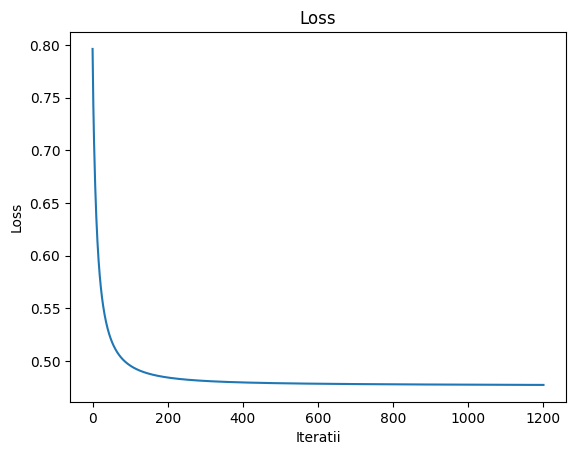

In [17]:
plt.title("Loss")
plt.plot(losses)
plt.xlabel("Iteratii")
plt.ylabel("Loss")

In [18]:
y_pred = predict(X, w)

In [19]:
print(classification_report(y, y_pred))
confusion_matrix = metrics.confusion_matrix(y, y_pred)
conf_matrix_df = pd.DataFrame(confusion_matrix, index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])
print(conf_matrix_df)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2114
           1       0.77      0.80      0.78      2137

    accuracy                           0.78      4251
   macro avg       0.78      0.78      0.78      4251
weighted avg       0.78      0.78      0.78      4251

                 Predicted Negative  Predicted Positive
Actual Negative                1590                 524
Actual Positive                 419                1718
